In [21]:
# This notebook plots heatmaps for mutation rate analysis

In [22]:
%pylab inline
import glob
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.ticker as ticker
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [23]:
# Different colormap options: 'binary', 'hot_r', 'Blues', 'YlGnBu', 'Greens', 'viridis', 'cool'
def main():
    colormap = 'hot_r'
    folders = ['trii25','trii26','trii27','trii28']
    num_files = 36 #Period 2: 30, Period 3: 72, Period 4: 36
    per = 4
    list_of_percents = []
    
    # Period 2 info
    #list_opt = ['11','12','13','14','15','16','17','18','19','20']
    #list_motifs = ['AC','AG','AT']
    
    # Period 3 info
    #list_opt = ['05','06','07','08','09','10','11','12','13']
    #list_motifs = ['ACC','AGG','AGC','CCG','AAG','AAC','ATC','AAT'] #['AAC','ACC','AGG','AAG','AAT']
    
    # Period 4 info
    list_opt = ['07','08','09','10']
    list_motifs = ['AAGG','AAAT','ATCC','AATC','AAAC','AATG','ACAT','AGAT','AAAG'] #['AAAC','AATG','AAAT']
    
    # Plot heatmap for each motif in given period
    for folder in folders:
        for motif in list_motifs:
            for opt in list_opt:
                file_list = glob.glob('/gymreklab-tscc/bonnieh/heatmap/results/%s/per_%d_*%s*opt_%s.txt'%(folder, per, motif, opt))
                file_list.sort() 
                
                if len(file_list) == 0:
                    list_of_percents.append(0)
                    
                else:
                    filename = file_list[0]
                    results_file = open(filename, 'r')
                    lines = results_file.readlines()
                    if len(lines) < 10:
                        list_of_percents.append(0)
                    else:
                        line = lines[9]
                        info = line.strip().split(': ')
                        num_acc = int(info[1])
                        percent = num_acc 
                        list_of_percents.append(percent)
                
    transition_matrix = np.zeros((len(folders), num_files))
    
    counter = 0
    
    for i in range(len(folders)):
        for j in range(num_files):
            
            transition_matrix[i,j] = list_of_percents[counter]
            counter = counter + 1
   
    # Visualize heatmap
    
    print(transition_matrix)
    #settings = ["z","a", "b", "c", "d","e"] # Mutation rate settings for period 2
    settings = ['a','b','c','d'] # Mutation rate settings for periods 3 and 4
    
   
    opt = []
    for mot in list_motifs:
        for opt_num in list_opt:
            opt.append(mot + ' ' + opt_num)

    fig = plt.figure(figsize = (15,3))
    ax = fig.add_subplot(111)
    im = ax.imshow(np.log10(transition_matrix),cmap=colormap)
    cbar = fig.colorbar(im)
    cbar.ax.set_ylabel('Log 10 of Number of ABC Acceptances')

    # Show all ticks
    ax.set_xticks(np.arange(len(opt)))
    ax.set_yticks(np.arange(len(settings)))
    
    # Label ticks
    ax.set_xticklabels(opt)
    ax.set_yticklabels(settings)

    # Rotate tick labels 
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.setp(ax.get_yticklabels(), ha="right",
             rotation_mode="anchor")
    ax.set_ylim(3.5,-0.5) # x=5.5 for period 2, x=3.5 for periods 3 and 4
    '''
    # Loop over data and create text annotations
    for i in range(len(settings)):
        for j in range(len(opt)):
            text = ax.text(j, i, transition_matrix[i, j],
                           ha="center", va="center", color="w")
    '''
    ax.set_title("Dependence of ABC acceptance rates \n on mutation rates")
    fig.tight_layout()
    ax.set_xlabel('Motif and Optimal allele')
    ax.set_ylabel('Mutation rate setting')
    plt.savefig("heatmap.png")
    plt.show()
    
    #plt.savefig(PLOTDIR + 'mutation_matrix/with_eps/mutation_matrix_%s_beta_%.2f_p_%.2f_mu_%.2E_L_%.2f.pdf'%(colormap, beta, p, mu, L), bbox_inches='tight')

[[1.890e+02 0.000e+00 1.000e+00 3.800e+01 1.650e+02 2.230e+02 5.871e+03
  3.800e+02 3.300e+01 1.500e+01 1.190e+02 3.700e+01 1.000e+00 3.400e+01
  1.670e+02 5.060e+03 0.000e+00 1.000e+00 4.500e+01 8.070e+02 3.800e+01
  0.000e+00 2.550e+02 3.430e+02 7.100e+01 1.290e+03 1.790e+02 1.300e+01
  0.000e+00 0.000e+00 1.000e+00 8.835e+03 5.000e+00 2.000e+00 1.140e+02
  1.200e+01]
 [6.900e+02 9.000e+00 1.670e+02 3.300e+01 1.440e+02 9.959e+03 3.520e+02
  3.170e+02 2.300e+01 1.600e+01 1.200e+01 3.700e+01 0.000e+00 1.200e+01
  3.300e+01 4.231e+03 0.000e+00 0.000e+00 0.000e+00 4.560e+02 3.600e+01
  0.000e+00 8.400e+01 2.090e+02 5.200e+01 1.033e+03 3.400e+01 1.200e+01
  0.000e+00 0.000e+00 9.500e+02 1.601e+03 1.200e+01 5.000e+00 1.248e+03
  1.900e+01]
 [8.010e+02 0.000e+00 0.000e+00 7.000e+00 0.000e+00 0.000e+00 1.688e+03
  3.920e+02 1.700e+02 4.600e+01 7.700e+01 4.400e+01 9.600e+01 7.260e+02
  1.230e+02 4.830e+03 1.603e+03 6.240e+02 2.400e+01 5.970e+02 6.290e+02
  1.220e+02 3.400e+02 2.450e+02 2.600e

/storage/BonnieH/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in log10


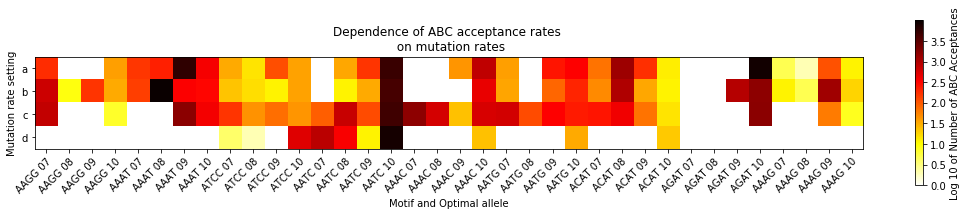

CPU times: user 2.16 s, sys: 470 ms, total: 2.63 s
Wall time: 2.87 s


In [24]:
%%time
if __name__ == '__main__':
    main()